In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [3]:
Main_folder="/content/drive/MyDrive/Colab Notebooks/Projects on hand/SPCUP/"
project_folder=Main_folder+"ML Project/"
dataset_path=Main_folder+"spcup_2022_training_part1/"

In [4]:
#Reading audio file  names and labels
metadata=pd.read_csv(dataset_path+"labels.csv")
metadata.head()

,track,algorithm
0,00050dd7458cf08e594c797930696bce.wav,4
1,00070e7c531000d3dddc735d107275a9.wav,2
2,000f0711027a69b7f3886c2dbcb7d41f.wav,3
3,001e28e66dee24408aaf3480dfb95fbe.wav,1
4,001eee950f60613869544b72cd48fe97.wav,2


In [5]:
metadata['algorithm'].value_counts()

4    1000
2    1000
3    1000
1    1000
0    1000
Name: algorithm, dtype: int64

In [6]:
Files = list(metadata['track']);
print(Files)
print(len(Files))

Y = list(metadata['algorithm']);
print(Y)
print(len(Y))

del metadata

['00050dd7458cf08e594c797930696bce.wav', '00070e7c531000d3dddc735d107275a9.wav', '000f0711027a69b7f3886c2dbcb7d41f.wav', '001e28e66dee24408aaf3480dfb95fbe.wav', '001eee950f60613869544b72cd48fe97.wav', '001f59a6ef884e2071ba1ee52cba8d09.wav', '0022a32237a11ee475c7b96d82369596.wav', '0022e7014db5482004d9e6f731cfbc8b.wav', '00317a6d7effa97c0dc7e1cf1b6d542d.wav', '0036636e89ad53945f0f2707c09f148e.wav', '004e173fc8d58405c9cec8b256f52842.wav', '006c78a2629d193baf69107e6f9557ff.wav', '0081bef2286c79fd30cae67792086100.wav', '00856bb9827f0d85111fa409211dbf7e.wav', '008e269e45cb63d2e6f07508a5482000.wav', '0093f56df1acd069bbf88ede88eb528d.wav', '00a0661d8351e5132cb0df5e1b4f19e2.wav', '00aa20bc49a1008240105ad2d63a0f64.wav', '00afd54110183acd564d14422119da23.wav', '00b75d43ebb31451f80e742fdab790d7.wav', '00c04d4ba166de6330f874014e58f6c6.wav', '00c9a92b0acc342402454e6db238bbcc.wav', '00d4474165837abbefaf1ae62bfa67e8.wav', '00d4b9d83e9fffc2ac59549c8219b8eb.wav', '00dd0e930b7e6dc5a9f2286127fac6e1.wav',

In [5]:
feature_names=["chroma_stft_simple_mean",  "chroma_stft_power_spectogram_mean" , 'chroma_stft_energy_spectrum_mean', 'mfcc_simple_mean',\
               "chroma_cqt_simple_mean",  "melspectogram_mean"  ];

# Reading entire audio dataset and generating features

In [12]:

#Compute a chromagram from a waveform 
def chroma_stft_simple_mean_feature(audio, sample_rate):
  C=librosa.feature.chroma_stft(y=audio, sr=sample_rate)
  C_mean = np.mean(C.T,axis=0)

  return C_mean;


#Compute a chromagram using a pre-computed power spectrogram with a larger frame -mean
def chroma_stft_power_spectogram_mean_feature(audio, sample_rate):
  S = np.abs(librosa.stft(audio, n_fft=4096))**2
  chroma = librosa.feature.chroma_stft(S=S, sr=sample_rate)
  C_mean = np.mean(chroma.T,axis=0) 
  return  C_mean;

#Compute a chromagram using an energy (magnitude) spectrum - mean
def chroma_stft_energy_spectrum_mean_feature(audio, sample_rate):
  S = np.abs(librosa.stft(audio))
  chroma = librosa.feature.chroma_stft(S=S, sr=sample_rate)
  C_mean = np.mean(chroma.T,axis=0)    
  return  C_mean;



#MFCC
def mfcc_simple_mean_feature(audio, sample_rate ):
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


def chroma_cqt_simple_mean_feature(audio, sample_rate):
  C=librosa.feature.chroma_cqt(y=audio, sr=sample_rate)
  C_mean = np.mean(C.T,axis=0)

  return C_mean;


def melspectrogram_mean_feature(audio, sample_rate):
  C=librosa.feature.melspectrogram(y=audio, sr=sample_rate)
  C_mean = np.mean(C.T,axis=0)

  return  C_mean;





In [ ]:
from collections import defaultdict
#SAVING AUDIO FILES IN CSV
def read_audio_clip(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    return audio, sample_rate


Features = defaultdict(list);


for i in range(0,len(Files)):
    break
    file_name = dataset_path+Files[i]
    audio, sample_rate=read_audio_clip(file_name)
    if(i%100 == 0):
      print('{} data files have been read'.format(i))
    #print(i)
    #print(len(audio))
    #print(sample_rate)

    

    Features["chroma_stft_simple_mean"].append([chroma_stft_simple_mean_feature(audio, sample_rate),Y[i]]);
    Features["chroma_stft_power_spectogram_mean"].append([chroma_stft_power_spectogram_mean_feature(audio, sample_rate), Y[i]]);
    Features['chroma_stft_energy_spectrum_mean'].append([chroma_stft_energy_spectrum_mean_feature(audio, sample_rate), Y[i]]);
    Features['mfcc_simple_mean'].append([ mfcc_simple_mean_feature(audio, sample_rate ), Y[i]]);  
    Features["chroma_cqt_simple_mean"].append([chroma_cqt_simple_mean_feature(audio, sample_rate), Y[i]]);
    Features[ "melspectogram_mean" ].append([ melspectrogram_mean_feature(audio, sample_rate ), Y[i]]);

    
   
print("Feature generation phase complete")


0 data files have been read
100 data files have been read
200 data files have been read
300 data files have been read
400 data files have been read
500 data files have been read
600 data files have been read
700 data files have been read
800 data files have been read
900 data files have been read
1000 data files have been read
1100 data files have been read
1200 data files have been read
1300 data files have been read
1400 data files have been read
1500 data files have been read
1600 data files have been read
1700 data files have been read
1800 data files have been read
1900 data files have been read
2000 data files have been read
2100 data files have been read
2200 data files have been read
2300 data files have been read
2400 data files have been read
2500 data files have been read
2600 data files have been read
2700 data files have been read
2800 data files have been read
2900 data files have been read
3000 data files have been read
3100 data files have been read
3200 data files have

In [14]:
for fn in feature_names:
   print(fn)
   #print(len(Features[fn][0]))
   #print(Features[fn][0][0])
 
   #print(len(Features[fn][0]))
   #print(Features[fn][0][1])
   

chroma_stft_simple_mean
chroma_stft_power_spectogram_mean
chroma_stft_energy_spectrum_mean
mfcc_simple_mean
chroma_cqt_simple_mean
melspectogram_mean


# savings audio features in  CSV format inside 'audio_feature' folder

In [15]:
from pathlib import Path  
feature_storage_folder = project_folder+'audio_features/';

saved_feature_storage_folder = project_folder+'bkp_saved_audio_features/';

In [ ]:
for fn in feature_names:
  break
  print(Features[fn][0][0].shape)
  print(len(Features[fn]))
  
  extracted_features_df=pd.DataFrame(Features[fn],columns=['feature','class'])

  del Features[fn]

  #print(extracted_features_df.head(10))

  feature_list = extracted_features_df['feature'].tolist()
  class_list = extracted_features_df['class'].tolist()

  new_df = pd.DataFrame(feature_list)
  new_df['class'] = class_list
  #print(new_df.head(10))

  feature_filepath=Path(feature_storage_folder+fn+".csv")  
  feature_filepath.parent.mkdir(parents=True, exist_ok=True)  
  new_df.to_csv(feature_filepath) 
  print(fn , " csv writing complete")




# Loading saved features and executing 10-fold

NOTE : We can directly start the execution from here once extracted features are saved

In [6]:
from pathlib import Path  
saved_feature_storage_folder = project_folder+'saved_audio_features/';

## Reading all features types in dictionary < key = feature_name , value = df_features >

In [7]:
features_df_dict=defaultdict(pd.core.frame.DataFrame)

for fn in feature_names:
  print(fn)
  df = pd.read_csv(saved_feature_storage_folder+fn+'.csv')
  df = df.drop(df.columns[0], axis=1)

  print(df)

  features_df_dict[fn]=df
  
  print("\n=========================================================================")

chroma_stft_simple_mean
             0         1         2         3         4         5         6  \
0     0.178188  0.233350  0.257310  0.243781  0.279907  0.331319  0.407183   
1     0.180909  0.222671  0.246625  0.301796  0.349281  0.341372  0.314230   
2     0.266947  0.226308  0.287882  0.480723  0.501119  0.391111  0.320555   
3     0.297043  0.310655  0.328525  0.358558  0.422256  0.422185  0.345977   
4     0.447084  0.341432  0.243476  0.215933  0.230098  0.347492  0.352028   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.482317  0.513257  0.471118  0.466253  0.505858  0.527994  0.498114   
4996  0.297161  0.242682  0.243907  0.293642  0.295928  0.291482  0.282308   
4997  0.310219  0.285590  0.262738  0.236139  0.187315  0.249121  0.325180   
4998  0.262764  0.332197  0.374918  0.333274  0.322522  0.368312  0.298059   
4999  0.261061  0.259049  0.267435  0.350758  0.379390  0.318280  0.319691   

             7         8         9     

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import svm 
import pickle
K =10;
skf = StratifiedKFold(n_splits = K)



In [10]:
def feature_skf_fold(df_read,feature_name):
  
  MODEL_SAVE_PATH = project_folder+'saved_models/'
  
  train_y = df_read['class']
  train_x = df_read.drop(['class'],axis=1)


  per_fold_accuracy = []
  per_fold_confusion_matrix=[]



  fold_var = 1

  for train_index, val_index in skf.split(train_x, train_y):
    
    print("Fold No. ", fold_var)

    training_data = df_read.iloc[train_index]
    validation_data =df_read.iloc[val_index]

    y_train = np.array(training_data['class'])
    X_train = np.array(training_data.drop(['class'],axis=1))


  
    y_val = np.array(validation_data['class'])
    X_val = np.array(validation_data.drop(['class'],axis=1))

    #--------------------------------------------

    model = svm.SVC(kernel = 'linear', C=1, probability=True).fit(X_train, y_train)

    #--------------------------------------------

    y_val_predict = model.predict(X_val)  
    Confusion_Matrix=confusion_matrix(y_val, y_val_predict)
    print(Confusion_Matrix)

    per_fold_confusion_matrix.append(Confusion_Matrix)  


    accuracy= model.score(X_val,y_val)
    print(accuracy)

    per_fold_accuracy.append(accuracy)  


    #--------------------------------------------

    Model_Name=str(model).replace(",","_").replace(" ", "_").replace(")", "_").replace("(", "_").replace("'", "").replace("=","_") + feature_name
    print(Model_Name)

    Absolute_MODEL_SAVE_PATH = MODEL_SAVE_PATH + Model_Name+"/"


    if not os.path.exists(Absolute_MODEL_SAVE_PATH):os.makedirs(Absolute_MODEL_SAVE_PATH)
    pickle.dump(model, open(Absolute_MODEL_SAVE_PATH+"SavedModel.sav", 'wb'))



  
    fold_var += 1


    print('===================================================================')

    

  avg_accuracy = sum(per_fold_accuracy)/len(per_fold_accuracy)

  return avg_accuracy, per_fold_accuracy, per_fold_confusion_matrix;
  



# Training SVM model with individual features

In [27]:
skf_feature_avg_accuracy_dict=defaultdict(float)

skf_feature_all_fold_val_accuracy_list=defaultdict(list)

skf_feature_per_fold_confusion_mat=defaultdict(list)


for fn in feature_names:

  print("Feature Name : ", fn)

  df=features_df_dict[fn]


  avg_accuracy, per_fold_accuracy, per_fold_confusion_matrix = feature_skf_fold(df,fn);

  skf_feature_avg_accuracy_dict[fn]=avg_accuracy


  skf_feature_all_fold_val_accuracy_list[fn]=per_fold_accuracy


  skf_feature_per_fold_confusion_mat[fn]=per_fold_confusion_matrix




Feature Name :  chroma_stft_simple_mean
Fold No.  1
[[95  0  5  0  0]
 [ 1 81 12  2  4]
 [17 19 63  1  0]
 [ 0  2  2 96  0]
 [ 2  1  3  0 94]]
0.858
SVC_C_1__kernel_linear__probability_True_chroma_stft_simple_mean
Fold No.  2
[[83  2 15  0  0]
 [ 0 81 15  2  2]
 [16 12 72  0  0]
 [ 0  3  1 95  1]
 [ 0  2  2  0 96]]
0.854
SVC_C_1__kernel_linear__probability_True_chroma_stft_simple_mean
Fold No.  3
[[90  4  6  0  0]
 [ 2 76 14  2  6]
 [20 16 63  0  1]
 [ 0  3  0 97  0]
 [ 0  1  3  1 95]]
0.842
SVC_C_1__kernel_linear__probability_True_chroma_stft_simple_mean
Fold No.  4
[[94  0  6  0  0]
 [ 2 73 21  1  3]
 [18 19 58  0  5]
 [ 0  4  0 95  1]
 [ 5  0  3  0 92]]
0.824
SVC_C_1__kernel_linear__probability_True_chroma_stft_simple_mean
Fold No.  5
[[90  0 10  0  0]
 [ 1 80 13  3  3]
 [17 16 65  0  2]
 [ 0  2  1 97  0]
 [ 2  6  4  0 88]]
0.84
SVC_C_1__kernel_linear__probability_True_chroma_stft_simple_mean
Fold No.  6
[[85  0 15  0  0]
 [ 6 70 21  0  3]
 [14 14 71  0  1]
 [ 0  5  0 94  1]
 [ 1  7

In [24]:
print("Average Accuracy for each feature")
#print(skf_feature_avg_accuracy_dict)

for fn in feature_names:
  print(fn , " :  ",skf_feature_avg_accuracy_dict [fn] )

#print("Per fold accuracy for each feature")
#print(skf_feature_all_fold_val_accuracy_list)

#print("Confusion Matrix")
#print(skf_feature_per_fold_confusion_mat)


Average Accuracy for each feature
chroma_stft_simple_mean  :   0.8398
chroma_stft_power_spectogram_mean  :   0.8056000000000001
chroma_stft_energy_spectrum_mean  :   0.8626000000000001
mfcc_simple_mean  :   0.9606
chroma_cqt_simple_mean  :   0.86
melspectogram_mean  :   0.9204000000000001


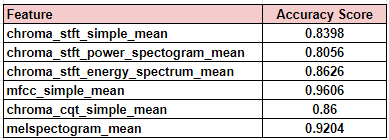

# Training SVM model with concatenated features

In [36]:
import itertools
concatenated_features_list =[];

for i in range(2,4):
  if len(concatenated_features_list) ==0 :
    concatenated_features_list= list(itertools.combinations(feature_names[-3:], i));
  else:  
    concatenated_features_list.append(list(itertools.combinations(feature_names[-3:], i))[0])

print(concatenated_features_list)  
print(len(concatenated_features_list ))


[('mfcc_simple_mean', 'chroma_cqt_simple_mean'), ('mfcc_simple_mean', 'melspectogram_mean'), ('chroma_cqt_simple_mean', 'melspectogram_mean'), ('mfcc_simple_mean', 'chroma_cqt_simple_mean', 'melspectogram_mean')]
4


In [37]:
skf_concatenated_feature_avg_accuracy_dict=defaultdict(float)

skf_concatenated_feature_all_fold_val_accuracy_list=defaultdict(list)

skf_concatenated_feature_per_fold_confusion_mat=defaultdict(list)





for cfl in concatenated_features_list:

  FeatureConcatDF=pd.core.frame.DataFrame();

  print(cfl)

  #print("Feature Name : ", cfl[0])
  FeatureConcatDF=features_df_dict[cfl[0]].copy();
  class_col = FeatureConcatDF['class'].copy();
  FeatureConcatDF.drop(['class'], axis=1,inplace=True)
  #print(class_col)


  for fn in cfl[1:]:

    #print("Feature Name : ", fn)

    df=features_df_dict[fn]

    #print(df)

    new_df=df.drop(['class'], axis=1);
    
    FeatureConcatDF=pd.concat([FeatureConcatDF, new_df], axis=1).copy()

    #print(FeatureConcatDF)

    #print("----------------------------------------")




  FeatureConcatDF['class'] = class_col
  #print(FeatureConcatDF.columns)


  fn_new = "_".join(cfl)
  #print(fn_new)
  
  NewColumnsList=[ str(x) for x in range(0,len(FeatureConcatDF.columns)-1)];
  NewColumnsList.append('class');
  #print(NewColumnsList)
  FeatureConcatDF.columns =NewColumnsList;
  
  print(FeatureConcatDF)
  print(FeatureConcatDF.shape)

  print(FeatureConcatDF.columns)


  
  avg_accuracy, per_fold_accuracy, per_fold_confusion_matrix = feature_skf_fold(FeatureConcatDF,fn_new);

  skf_concatenated_feature_avg_accuracy_dict[fn_new]=avg_accuracy

  skf_concatenated_feature_all_fold_val_accuracy_list[fn_new]=per_fold_accuracy

  skf_concatenated_feature_per_fold_confusion_mat[fn_new]=per_fold_confusion_matrix

  


  print("=======================================================================")


('mfcc_simple_mean', 'chroma_cqt_simple_mean')
              0           1          2          3          4          5  \
0    -274.68332  133.826320 -23.235909  36.618690  -9.542367  -0.814940   
1    -252.77496  117.856940 -26.044134  42.881990 -39.102844  -8.357111   
2    -264.54938  115.443710 -27.519976  37.166270 -36.911266 -14.492989   
3    -254.96996  120.667076 -38.651676  31.026987 -36.487953  -7.454093   
4    -282.82900  124.362870 -31.122828  49.695744 -41.352753 -19.057740   
...         ...         ...        ...        ...        ...        ...   
4995 -228.97984  151.682040 -34.857014  56.431732 -10.435169  16.248684   
4996 -217.05390  123.940980 -29.990162  47.655320 -17.319714   9.111507   
4997 -268.69480  104.164670 -37.095306  38.208620  -6.701840 -10.206513   
4998 -255.66139  107.097160 -34.838290  39.136650 -38.737907 -17.651873   
4999 -225.87015  127.666245 -28.800268  39.774033 -13.421027   1.672399   

              6          7          8          9  ..

In [38]:
#print( skf_concatenated_feature_avg_accuracy_dict)

print('Average Accuracy Concatenated Features :')

for fn in skf_concatenated_feature_avg_accuracy_dict.keys():
  print(fn , " :  ",skf_concatenated_feature_avg_accuracy_dict [fn] )


#print(skf_concatenated_feature_all_fold_val_accuracy_list)

#print(skf_concatenated_feature_per_fold_confusion_mat)



Average Accuracy Concatenated Features :
mfcc_simple_mean_chroma_cqt_simple_mean  :   0.9625999999999999
mfcc_simple_mean_melspectogram_mean  :   0.9697999999999999
chroma_cqt_simple_mean_melspectogram_mean  :   0.9349999999999999
mfcc_simple_mean_chroma_cqt_simple_mean_melspectogram_mean  :   0.9713999999999998


In [49]:
skf_concatenated_feature_all_fold_val_accuracy_list

defaultdict(list,
            {'chroma_cqt_simple_mean_melspectogram_mean': [0.93,
              0.92,
              0.9,
              0.914,
              0.912,
              0.918,
              0.918,
              0.938,
              0.922,
              0.932],
             'mfcc_simple_mean_chroma_cqt_simple_mean': [0.882,
              0.858,
              0.86,
              0.838,
              0.854,
              0.86,
              0.854,
              0.874,
              0.86,
              0.86],
             'mfcc_simple_mean_chroma_cqt_simple_mean_melspectogram_mean': [0.93,
              0.92,
              0.9,
              0.914,
              0.912,
              0.918,
              0.918,
              0.938,
              0.922,
              0.932],
             'mfcc_simple_mean_melspectogram_mean': [0.93,
              0.92,
              0.9,
              0.914,
              0.912,
              0.918,
              0.918,
              0.938,
        

# Parameter Fine Tuning


### Individual MFCC Feature : 
We found MFCC features are giving best accuracy preceeded by melspectogram features.

Thus, we are trying to fine tune our model for MFCC features only.

In [12]:
C_list=[];

i=2**(-10);

i=2**(-4);

while i <=  8: #   2**10:
  C_list.append(i) 
  i=i*2;


print(C_list)


[0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0]


In [13]:
#Searching for best parameter combination

#Loading features 
mfcc_df=features_df_dict['mfcc_simple_mean']

Y = mfcc_df['class']
X = mfcc_df.drop(['class'],axis=1)

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
                        X,Y, stratify=Y,
                test_size = 0.20, random_state = 101)




from sklearn.model_selection import GridSearchCV
 

param_grid = {'C': C_list,
              'kernel': ['linear', 'rbf']}              
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 4)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...........C=0.0625, kernel=linear;, score=0.965 total time=   0.4s
[CV 2/5] END ...........C=0.0625, kernel=linear;, score=0.954 total time=   0.6s
[CV 3/5] END ...........C=0.0625, kernel=linear;, score=0.951 total time=   0.4s
[CV 4/5] END ...........C=0.0625, kernel=linear;, score=0.960 total time=   0.3s
[CV 5/5] END ...........C=0.0625, kernel=linear;, score=0.948 total time=   0.3s
[CV 1/5] END ..............C=0.0625, kernel=rbf;, score=0.695 total time=   2.3s
[CV 2/5] END ..............C=0.0625, kernel=rbf;, score=0.759 total time=   2.7s
[CV 3/5] END ..............C=0.0625, kernel=rbf;, score=0.690 total time=   1.3s
[CV 4/5] END ..............C=0.0625, kernel=rbf;, score=0.698 total time=   1.2s
[CV 5/5] END ..............C=0.0625, kernel=rbf;, score=0.696 total time=   1.3s
[CV 1/5] END ............C=0.125, kernel=linear;, score=0.965 total time=   0.2s
[CV 2/5] END ............C=0.125, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0],
                         'kernel': ['linear', 'rbf']},
             verbose=4)

In [34]:
from sklearn.metrics import classification_report

# best parameter after tuning
print(grid.best_params_)
 
#  how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)
 
# classification report
print(classification_report(y_test, grid_predictions))

#  confusion Matrix

cnfMat = confusion_matrix(y_test, grid_predictions);
print(cnfMat)


# classification report
print(accuracy_score(y_test, grid_predictions))



{'C': 0.125, 'kernel': 'linear'}
SVC(C=0.125, kernel='linear')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.92      0.93      0.92       200
           2       0.93      0.92      0.92       200
           3       0.99      0.99      0.99       200
           4       1.00      1.00      1.00       200

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

[[200   0   0   0   0]
 [  0 185  14   1   0]
 [  0  16 183   1   0]
 [  0   1   0 199   0]
 [  0   0   0   0 200]]
0.967


In [15]:
grid.cv_results_

{'mean_fit_time': array([ 0.33525929,  1.35417724,  0.20007329,  0.78286552,  0.34759097,
         0.59884357,  0.51377974,  0.46126685,  1.1512311 ,  0.36912127,
         1.46876764,  0.42687564,  3.57695904,  0.22883525, 10.13224525,
         0.1770678 ]),
 'mean_score_time': array([0.03530617, 0.38480067, 0.01637607, 0.2267076 , 0.01435437,
        0.19832563, 0.01393428, 0.18067851, 0.0141542 , 0.15269752,
        0.01383958, 0.24162927, 0.01369457, 0.11292758, 0.03547473,
        0.0986537 ]),
 'mean_test_score': array([0.9555 , 0.7075 , 0.956  , 0.779  , 0.9545 , 0.80325, 0.955  ,
        0.85225, 0.9545 , 0.89475, 0.95425, 0.9265 , 0.95525, 0.9385 ,
        0.9555 , 0.94575]),
 'param_C': masked_array(data=[0.0625, 0.0625, 0.125, 0.125, 0.25, 0.25, 0.5, 0.5,
                    1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 8.0, 8.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fi

In [16]:
grid.cv_results_['split4_test_score']

array([0.9475 , 0.69625, 0.9525 , 0.79625, 0.95   , 0.8175 , 0.95   ,
       0.86125, 0.9525 , 0.8975 , 0.95125, 0.9275 , 0.9525 , 0.935  ,
       0.9525 , 0.95   ])

In [30]:
avg_split_accuracy = np.array(np.zeros((1,len(C_list)*2), dtype=float ));
avg_split_accuracy

for i in range(0, 5):
  print('split'+str(i)+'_test_score')

  avg_split_accuracy = np.add(avg_split_accuracy ,  grid.cv_results_['split'+str(i)+'_test_score'])



avg_split_accuracy=avg_split_accuracy/5;
avg_split_accuracy=avg_split_accuracy[0]
print(avg_split_accuracy)

linear_acc_scores=[];

rbf_acc_scores=[];

for i in range(0,len(avg_split_accuracy)):
  if i%2 ==0 :
    linear_acc_scores.append(avg_split_accuracy[i]);
  else:
    rbf_acc_scores.append(avg_split_accuracy[i]);      


print(linear_acc_scores)
print(rbf_acc_scores)





split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
[0.9555  0.7075  0.956   0.779   0.9545  0.80325 0.955   0.85225 0.9545
 0.89475 0.95425 0.9265  0.95525 0.9385  0.9555  0.94575]
[0.9555, 0.9560000000000001, 0.9545, 0.9550000000000001, 0.9545, 0.95425, 0.95525, 0.9555]
[0.7074999999999999, 0.779, 0.80325, 0.85225, 0.8947499999999999, 0.9265000000000001, 0.9385, 0.94575]


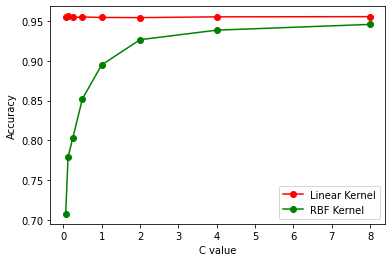

In [33]:
plt.plot(C_list, linear_acc_scores, label = "Linear Kernel",color = 'r',marker='o')
plt.plot(C_list, rbf_acc_scores, label = "RBF Kernel",color = 'g',marker='o')

plt.xlabel('C value')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
# plt.title('Accuaracy scores for different C values on codalab')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
categories = ['class 0','class 1','class 2','class 3','class 4']

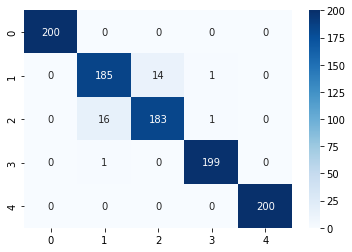

In [35]:
import seaborn as sns
sns.heatmap(cnfMat, annot=True,fmt="d",cmap='Blues')

## Parameter fine tuning on concatenated dataset

In [40]:
concatenated_features_list

[('mfcc_simple_mean', 'chroma_cqt_simple_mean'),
 ('mfcc_simple_mean', 'melspectogram_mean'),
 ('chroma_cqt_simple_mean', 'melspectogram_mean'),
 ('mfcc_simple_mean', 'chroma_cqt_simple_mean', 'melspectogram_mean')]

In [43]:


for cfl in concatenated_features_list[3:]:

  FeatureConcatDF=pd.core.frame.DataFrame();

  print(cfl)

 

  #print("Feature Name : ", cfl[0])
  FeatureConcatDF=features_df_dict[cfl[0]].copy();
  class_col = FeatureConcatDF['class'].copy();
  FeatureConcatDF.drop(['class'], axis=1,inplace=True)
  #print(class_col)


  for fn in cfl[1:]:

    #print("Feature Name : ", fn)

    df=features_df_dict[fn]

    #print(df)

    new_df=df.drop(['class'], axis=1);
    
    FeatureConcatDF=pd.concat([FeatureConcatDF, new_df], axis=1).copy()

    #print(FeatureConcatDF)

    #print("----------------------------------------")




  FeatureConcatDF['class'] = class_col
  #print(FeatureConcatDF.columns)


  fn_new = "_".join(cfl)
  #print(fn_new)
  
  NewColumnsList=[ str(x) for x in range(0,len(FeatureConcatDF.columns)-1)];
  NewColumnsList.append('class');
  #print(NewColumnsList)
  FeatureConcatDF.columns =NewColumnsList;
  
  print(FeatureConcatDF)
  print(FeatureConcatDF.shape)

  print(FeatureConcatDF.columns)


  
  # avg_accuracy, per_fold_accuracy, per_fold_confusion_matrix = feature_skf_fold(FeatureConcatDF,fn_new);

  # skf_concatenated_feature_avg_accuracy_dict[fn_new]=avg_accuracy

  # skf_concatenated_feature_all_fold_val_accuracy_list[fn_new]=per_fold_accuracy

  # skf_concatenated_feature_per_fold_confusion_mat[fn_new]=per_fold_confusion_matrix

  


  print("=======================================================================")
FeatureConcatDF

('mfcc_simple_mean', 'chroma_cqt_simple_mean', 'melspectogram_mean')
              0           1          2          3          4          5  \
0    -274.68332  133.826320 -23.235909  36.618690  -9.542367  -0.814940   
1    -252.77496  117.856940 -26.044134  42.881990 -39.102844  -8.357111   
2    -264.54938  115.443710 -27.519976  37.166270 -36.911266 -14.492989   
3    -254.96996  120.667076 -38.651676  31.026987 -36.487953  -7.454093   
4    -282.82900  124.362870 -31.122828  49.695744 -41.352753 -19.057740   
...         ...         ...        ...        ...        ...        ...   
4995 -228.97984  151.682040 -34.857014  56.431732 -10.435169  16.248684   
4996 -217.05390  123.940980 -29.990162  47.655320 -17.319714   9.111507   
4997 -268.69480  104.164670 -37.095306  38.208620  -6.701840 -10.206513   
4998 -255.66139  107.097160 -34.838290  39.136650 -38.737907 -17.651873   
4999 -225.87015  127.666245 -28.800268  39.774033 -13.421027   1.672399   

              6          7    

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,class
0,-274.68332,133.826320,-23.235909,36.618690,-9.542367,-0.814940,-11.763956,-7.777914,-3.847221,-8.043469,...,6.845999e-10,5.212463e-10,1.385945e-09,1.295964e-09,3.347013e-09,1.795184e-09,3.310762e-09,9.148295e-10,9.381619e-10,4
1,-252.77496,117.856940,-26.044134,42.881990,-39.102844,-8.357111,-27.407350,-26.406840,-12.529133,-13.869946,...,3.510389e-09,2.699817e-09,2.957635e-09,2.524365e-09,3.485679e-09,1.465336e-09,3.730539e-09,2.913909e-09,1.852565e-09,2
2,-264.54938,115.443710,-27.519976,37.166270,-36.911266,-14.492989,-22.974646,-15.050748,-10.201197,-14.346521,...,2.532689e-09,1.692523e-09,2.680006e-09,1.694493e-09,2.031659e-09,7.046421e-10,1.931228e-09,1.616767e-09,1.021442e-09,3
3,-254.96996,120.667076,-38.651676,31.026987,-36.487953,-7.454093,-23.164883,-25.452671,-18.764984,-11.470880,...,1.987039e-09,1.746738e-09,3.110628e-09,2.322851e-09,2.951468e-09,1.160975e-09,3.057424e-09,2.602598e-09,1.466876e-09,1
4,-282.82900,124.362870,-31.122828,49.695744,-41.352753,-19.057740,-15.155042,-17.722466,-16.178608,-16.792452,...,1.985025e-09,2.175588e-09,2.731021e-09,2.122551e-09,2.925727e-09,1.736193e-09,2.905137e-09,2.761791e-09,2.043572e-09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-228.97984,151.682040,-34.857014,56.431732,-10.435169,16.248684,-9.561151,-1.859146,-10.040398,-6.739991,...,7.956208e-10,4.556975e-10,1.017953e-09,1.407294e-09,2.259287e-09,1.714309e-09,2.111459e-09,1.715352e-09,1.106133e-09,4
4996,-217.05390,123.940980,-29.990162,47.655320,-17.319714,9.111507,-16.056416,-3.409832,-5.161389,-9.123678,...,1.056344e-09,1.001958e-09,2.165508e-09,1.714235e-09,5.070243e-09,2.717702e-09,5.380234e-09,3.587206e-09,1.675490e-09,4
4997,-268.69480,104.164670,-37.095306,38.208620,-6.701840,-10.206513,-11.953757,-12.944050,-6.926512,-9.184398,...,1.298377e-09,1.431072e-09,2.426957e-09,2.945853e-09,6.169282e-09,2.328919e-09,6.663482e-09,4.530748e-09,1.806590e-09,0
4998,-255.66139,107.097160,-34.838290,39.136650,-38.737907,-17.651873,-19.541323,-19.284237,-17.087837,-15.687194,...,1.320259e-09,1.201024e-09,1.711869e-09,1.300246e-09,1.670922e-09,6.528210e-10,1.828578e-09,1.629175e-09,1.017871e-09,1


In [44]:
C_list=[];

i=2**(-10);

i=2**(-4);

while i <=  8: #   2**10:
  C_list.append(i) 
  i=i*2;


print(C_list)


[0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0]


In [45]:

Y = FeatureConcatDF['class']
X = FeatureConcatDF.drop(['class'],axis=1)

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
                        X,Y, stratify=Y,
                test_size = 0.20, random_state = 101)




from sklearn.model_selection import GridSearchCV
 

param_grid = {'C': C_list,
              'kernel': ['linear', 'rbf']}              
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 4)
 
# fitting the model for grid search
grid.fit(X_train, y_train)



from sklearn.metrics import classification_report

# best parameter after tuning
print(grid.best_params_)
 
#  how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)
 
# classification report
print(classification_report(y_test, grid_predictions))

#  confusion Matrix

cnfMat = confusion_matrix(y_test, grid_predictions);
print(cnfMat)


# classification report
print(accuracy_score(y_test, grid_predictions))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...........C=0.0625, kernel=linear;, score=0.978 total time=   0.3s
[CV 2/5] END ...........C=0.0625, kernel=linear;, score=0.969 total time=   0.4s
[CV 3/5] END ...........C=0.0625, kernel=linear;, score=0.958 total time=   0.3s
[CV 4/5] END ...........C=0.0625, kernel=linear;, score=0.968 total time=   0.5s
[CV 5/5] END ...........C=0.0625, kernel=linear;, score=0.965 total time=   0.9s
[CV 1/5] END ..............C=0.0625, kernel=rbf;, score=0.791 total time=   3.7s
[CV 2/5] END ..............C=0.0625, kernel=rbf;, score=0.797 total time=   3.1s
[CV 3/5] END ..............C=0.0625, kernel=rbf;, score=0.790 total time=   2.8s
[CV 4/5] END ..............C=0.0625, kernel=rbf;, score=0.795 total time=   1.6s
[CV 5/5] END ..............C=0.0625, kernel=rbf;, score=0.784 total time=   1.6s
[CV 1/5] END ............C=0.125, kernel=linear;, score=0.978 total time=   0.5s
[CV 2/5] END ............C=0.125, kernel=linear;

In [46]:
avg_split_accuracy = np.array(np.zeros((1,len(C_list)*2), dtype=float ));
avg_split_accuracy

for i in range(0, 5):
  print('split'+str(i)+'_test_score')

  avg_split_accuracy = np.add(avg_split_accuracy ,  grid.cv_results_['split'+str(i)+'_test_score'])



avg_split_accuracy=avg_split_accuracy/5;
avg_split_accuracy=avg_split_accuracy[0]
print(avg_split_accuracy)

linear_acc_scores=[];

rbf_acc_scores=[];

for i in range(0,len(avg_split_accuracy)):
  if i%2 ==0 :
    linear_acc_scores.append(avg_split_accuracy[i]);
  else:
    rbf_acc_scores.append(avg_split_accuracy[i]);      


print(linear_acc_scores)
print(rbf_acc_scores)





split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
[0.96725 0.7915  0.967   0.8275  0.969   0.8655  0.96775 0.9035  0.968
 0.92525 0.96775 0.9385  0.96825 0.94525 0.96925 0.9525 ]
[0.9672499999999999, 0.9670000000000002, 0.969, 0.96775, 0.968, 0.96775, 0.96825, 0.9692500000000001]
[0.7915, 0.8275, 0.8654999999999999, 0.9035, 0.9252499999999999, 0.9385000000000001, 0.94525, 0.9525]


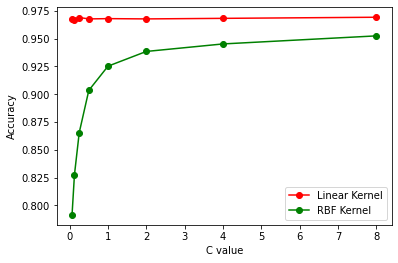

In [47]:
plt.plot(C_list, linear_acc_scores, label = "Linear Kernel",color = 'r',marker='o')
plt.plot(C_list, rbf_acc_scores, label = "RBF Kernel",color = 'g',marker='o')

plt.xlabel('C value')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
# plt.title('Accuaracy scores for different C values on codalab')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [48]:
categories = ['class 0','class 1','class 2','class 3','class 4']

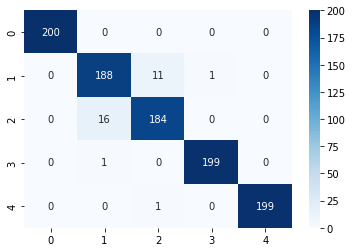

In [49]:
import seaborn as sns
sns.heatmap(cnfMat, annot=True,fmt="d",cmap='Blues')